In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np

In [118]:
# Modify the settings for the style and size of charts
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [119]:
df = pd.read_csv('insurance.csv')

In [120]:
df.shape

(1338, 7)

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [122]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

<AxesSubplot:xlabel='age', ylabel='Count'>

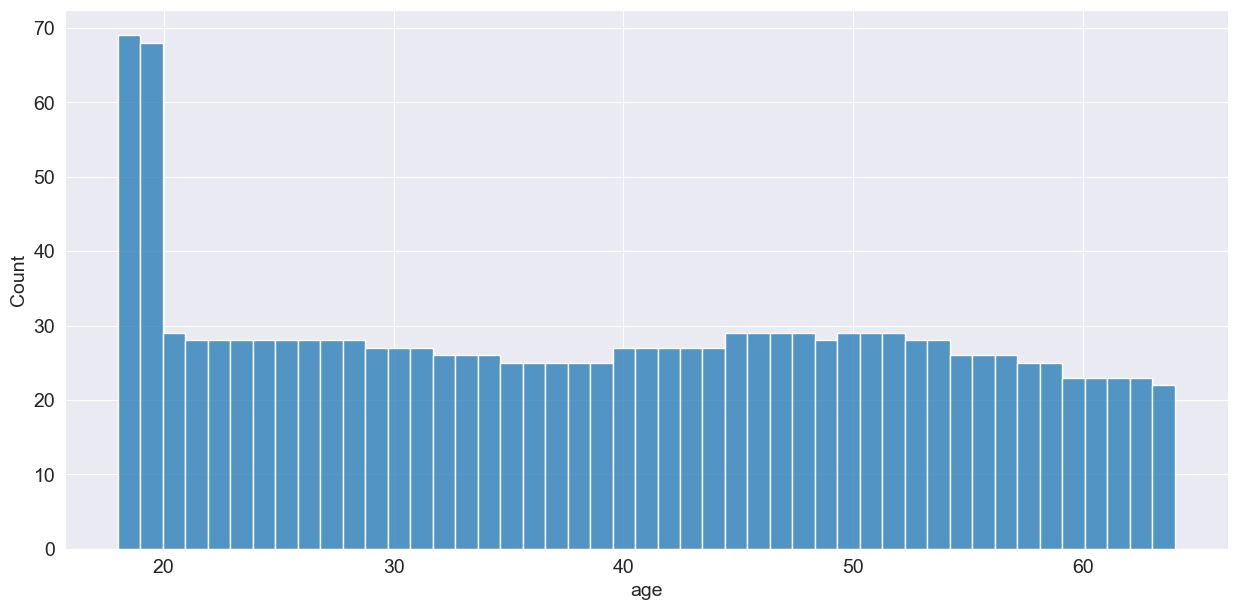

In [123]:
# Visualization age column
plt.figure(figsize=(15,7))
sns.histplot(df['age'], bins=47)

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

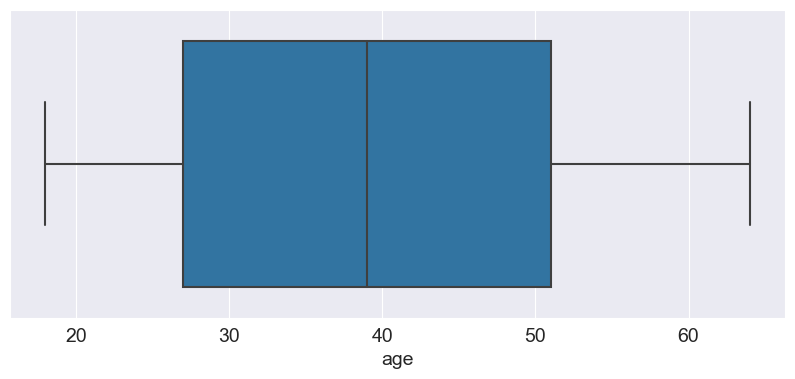

In [124]:
plt.figure(figsize=(10,4))
sns.boxplot(df['age'])

<AxesSubplot:xlabel='bmi', ylabel='Count'>

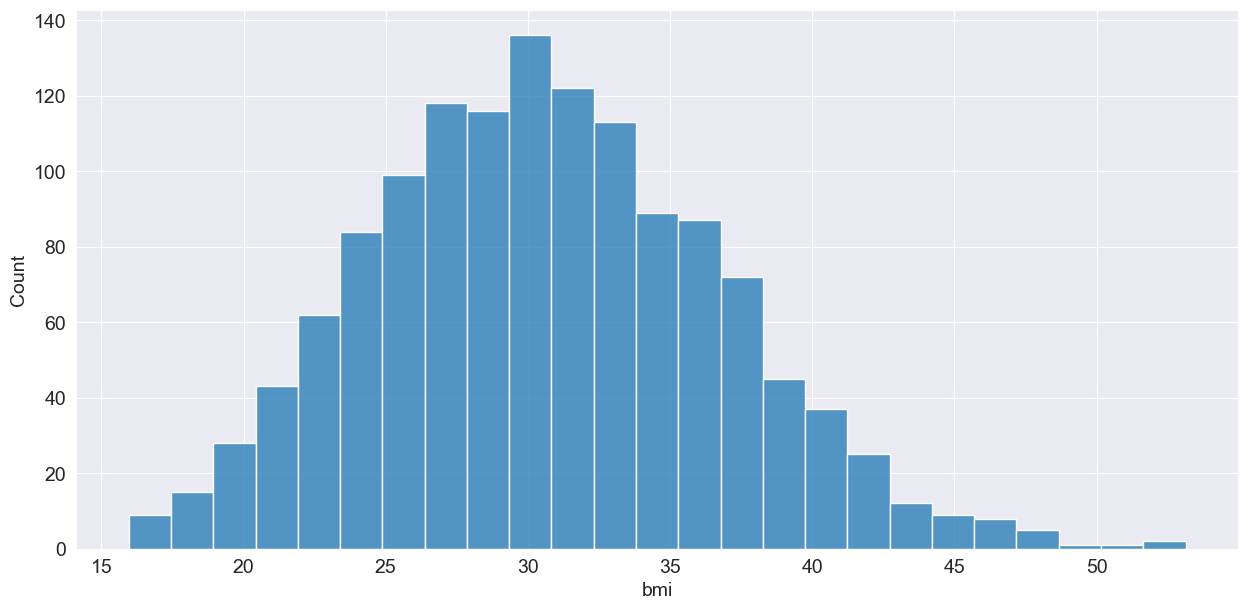

In [125]:
# Visualization BMI column
plt.figure(figsize=(15,7))
sns.histplot(df['bmi'])

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

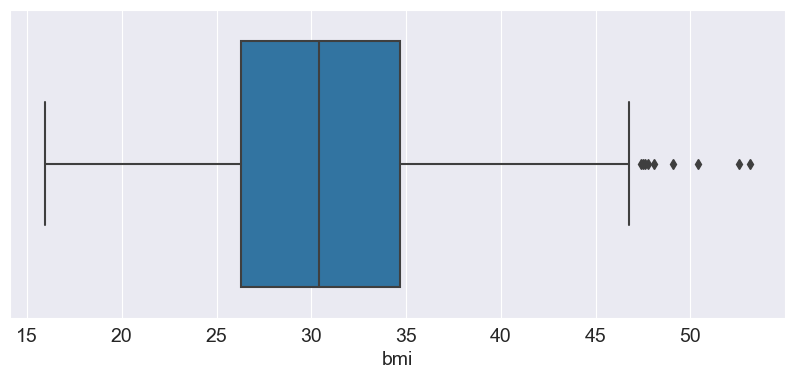

In [126]:
plt.figure(figsize=(10,4))
sns.boxplot(df['bmi'])

<AxesSubplot:xlabel='charges', ylabel='Count'>

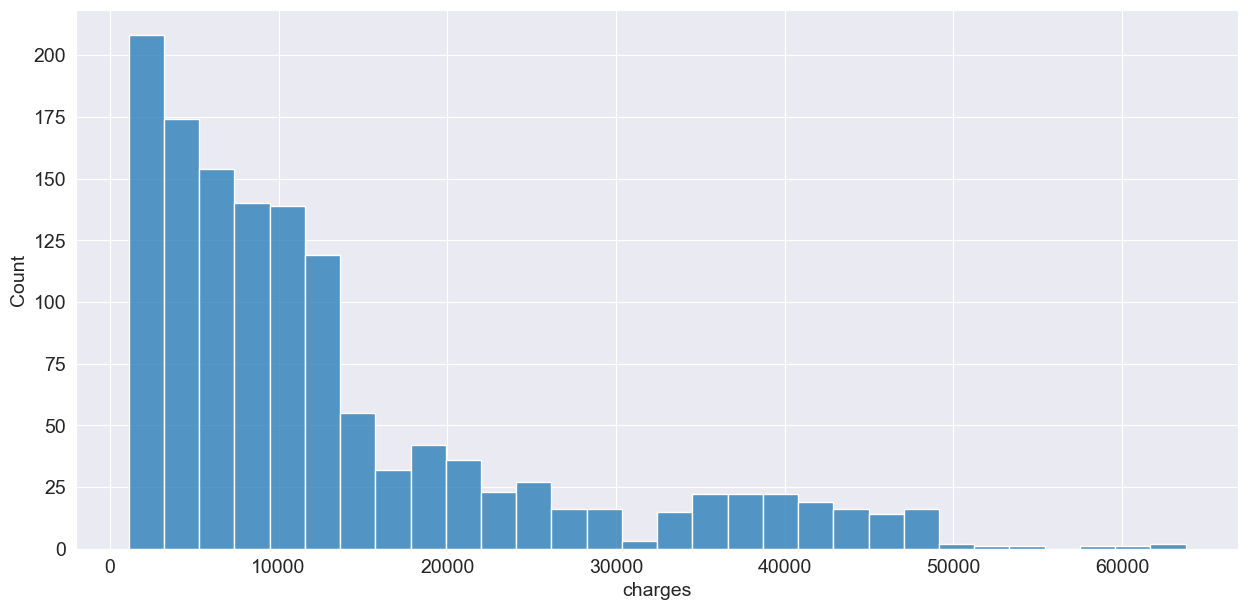

In [127]:
# Visualization charges column
plt.figure(figsize=(15,7))
sns.histplot(df['charges'])

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='charges'>

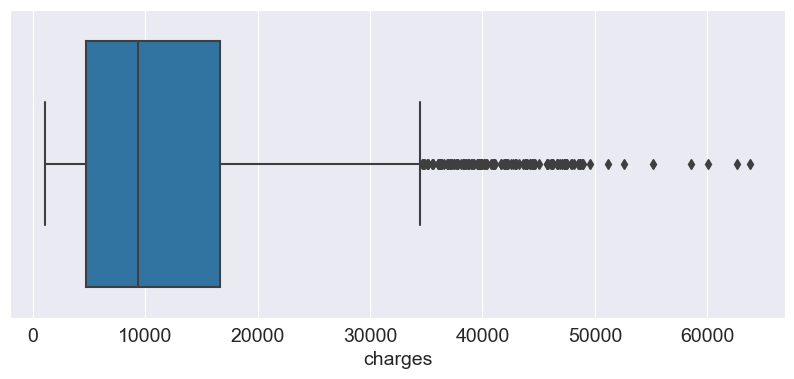

In [128]:
plt.figure(figsize=(10,4))
sns.boxplot(df['charges'])

In [129]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [130]:
max_limit = df.charges.mean() + 3*df.charges.std()
min_limit = df.charges.mean() - 3*df.charges.std()
max_limit, min_limit

(49600.45597522324, -23059.611444940725)

In [131]:
df = df[(df['charges'] > min_limit) & (df['charges'] < max_limit)]

In [132]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [133]:
df.shape

(1331, 7)

In [134]:
df.describe()

,age,bmi,children,charges
count,1331.000000,1331.000000,1331.00000,1331.000000
mean,39.185575,30.633017,1.09692,13036.775677
std,14.058021,6.088782,1.20603,11699.360324
min,18.000000,15.960000,0.00000,1121.873900
25%,26.000000,26.220000,0.00000,4719.630300
50%,39.000000,30.305000,1.00000,9301.893550
75%,51.000000,34.600000,2.00000,16359.170275
max,64.000000,53.130000,5.00000,49577.662400


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1331 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1331 non-null   int64  
 1   sex       1331 non-null   object 
 2   bmi       1331 non-null   float64
 3   children  1331 non-null   int64  
 4   smoker    1331 non-null   object 
 5   region    1331 non-null   object 
 6   charges   1331 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.2+ KB


<AxesSubplot:ylabel='smoker'>

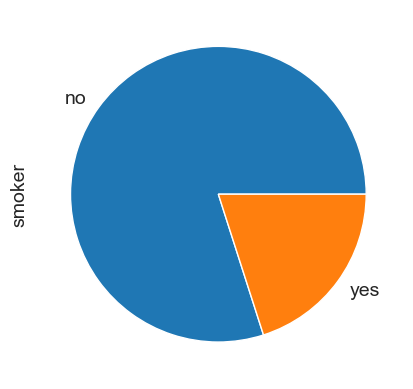

In [136]:
df['smoker'].value_counts().plot(kind='pie')

In [137]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


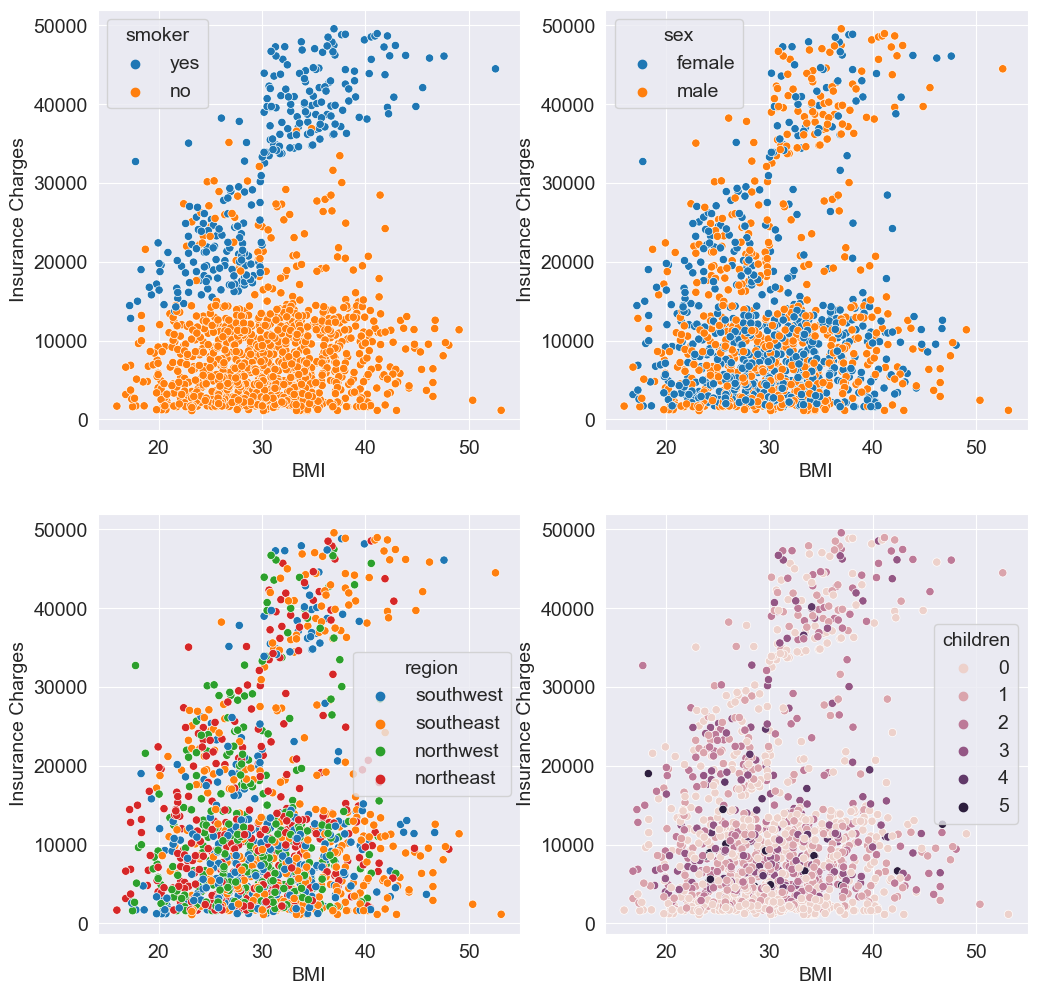

In [138]:
fig,axes = plt.subplots(2,2, figsize=(12,12))
hues=['smoker','sex','region','children']
for hue,ax in zip(hues,axes.flat):
    sns.scatterplot(data=df,x='bmi',y='charges',hue=hue, ax=ax)
    ax.set_xlabel("BMI")
    ax.set_ylabel("Insurance Charges")
plt.show()

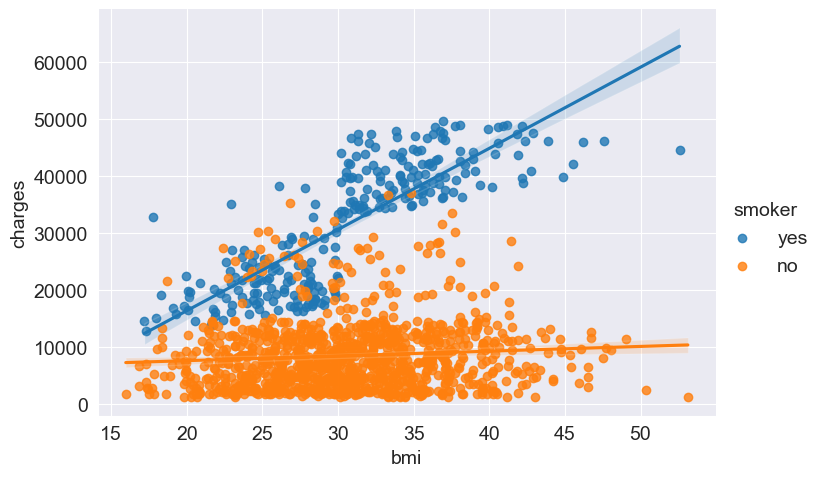

In [139]:
sns.lmplot(x='bmi',y='charges',hue='smoker',data=df,aspect=1.5,height=5)

In [140]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [141]:
df['sex'] = df['sex'].apply(lambda x: 1 if x == 'male' else 0)

In [142]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [143]:
df['smoker'] = df['smoker'].apply(lambda x: 1 if x == 'yes' else 0)

In [144]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [145]:
df.drop('region', axis = 1, inplace=True)

In [146]:
df.head()

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1331 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1331 non-null   int64  
 1   sex       1331 non-null   int64  
 2   bmi       1331 non-null   float64
 3   children  1331 non-null   int64  
 4   smoker    1331 non-null   int64  
 5   charges   1331 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 72.8 KB


In [148]:
X = df.drop('charges', axis=1)


In [149]:
y = df['charges']

In [150]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.2)

In [152]:
len(X_train)

1064

In [153]:
len(X_test)

267

In [154]:
model = LinearRegression()

In [155]:
model.fit(X_train, y_train.values)

LinearRegression()

In [156]:
model.score(X_test, y_test)

0.7628996330677628

In [159]:
def predict_charge(age, sex, bmi, children, smoker):
    x = np.zeros(len(X.columns))
    x[0] = age
    x[1] = sex
    x[2] = bmi
    x[3] = children
    x[4] = smoker
    return model.predict([x])[0]

In [160]:
predict_charge(19, 0, 27.9, 0, 1)

25075.714246768544

In [163]:
import pickle
with open('insurance_cost.pickle', 'wb') as f:
    pickle.dump(model, f)

In [164]:
import json 
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open('columns.json', 'w') as f:
    f.write(json.dumps(columns))